In [15]:
#############################################################################
####################Import all packages######################################
#############################################################################
import os
import random
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling as pp
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'
# Set working directory
#############################################################################
# Make Jupyter Notebook show ALL output of a cell, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

2.8

In [16]:
def read_all_csvs_in_folder(path):
    ''' Function reading in all CSV files in a given folder.
        1. First lists all files in folder.
        2. Then reads in only files which are NOT of file size = 0 and contain headers + AT LEAST 1 row of data
        3. Appends all files into a final dataframe
        4. Also prints the amount of files in the folder, and the amount of files used for the final dataframe.
    '''
    import pandas as pd
    import glob
    import os
    # Create list containing all files names of the current folder
    all_files = glob.glob(path + "/*.csv")
    # These empty lists will be filled with:
    # 1. the names of the CSV files we want to append/merge, 
    # 2. 2 lists containing numbers representing all the files that were empty (or headers but no row data) and not read
    
    list_with_dfs = []
    zero_files = []
    empty_files = []
    empty_row_files = []
    filename_list = []
    n_files_appended = 0
    
    print('')
    print('')
    print('#####################################################')
    print('STARTING READ IN')
    print('#####################################################')
    print('')
    
    for filename in all_files:        
        print('Reading current file:')
        print(filename)
        # Check whether the CSV file is larger than 0Bytes (if not, it has for sure no data and will break during read in)
        try:        
            if os.path.getsize(filename) == 0:
                zero_files.append(filename)                
                print('')
                print('------------------------------------------------------')
                print('!!! SKIPPING FILE: ' + filename)
                print('    REASON: FILE SIZE == 0')
                print('------------------------------------------------------')
                print('')
            if os.path.getsize(filename) > 0:
                df = pd.read_csv(filename, index_col=None, header=0)            
                if df.empty:
                    empty_row_files.append(filename)
                    print('')
                    print('------------------------------------------------------')
                    print('!!! SKIPPING FILE: ' + filename)
                    print('    REASON: FILE CONTAINS NO ROW DATA')
                    print('------------------------------------------------------')
                    print('')
                # Check whether the CSV is empty (this ALSO works when it DOES have headers, but no row data. This is important!)
                if not df.empty:
                    list_with_dfs.append(df)
                    n_files_appended = n_files_appended + 1
                    filename_list.append(filename)
        except pd.errors.EmptyDataError:
            print('')
            print('------------------------------------------------------')
            print('!!! SKIPPING FILE: ' + filename)
            print('    REASON: FILE ENTIRELY EMPTY WITHOUT HEADERS')
            print('------------------------------------------------------')
            print('')
            empty_files.append(filename)            
            pass
    
    # Merge all files in the file list
    frame = pd.concat(list_with_dfs, axis=0, ignore_index=True)
    print('')
    print('#####################################################')
    print('!!! DONE READING & MERGING DATA !!!')
    print('#####################################################')
    print('')
    print('------------------------------------------------------')
    print('All files: ' + str(len(all_files)))    
    print('')
    print('Successfully appended files: ' + str(n_files_appended))
    print('------------------------------------------------------')
    print('------------------------------------------------------')
    print('')
    print('Empty files without headers: ' + str(len(empty_files)))
    #print(len(empty_files))
    print(empty_files)
    print('')
    print('Zero size files: ' + str(len(zero_files)))
    #print(len(zero_files))
    print(zero_files)
    print('')
    print('Empty row files: ' + str(len(empty_row_files)))
    #print(len(empty_row_files))
    print(empty_row_files)
    print('')    
    print('#####################################################')
    
    return frame    

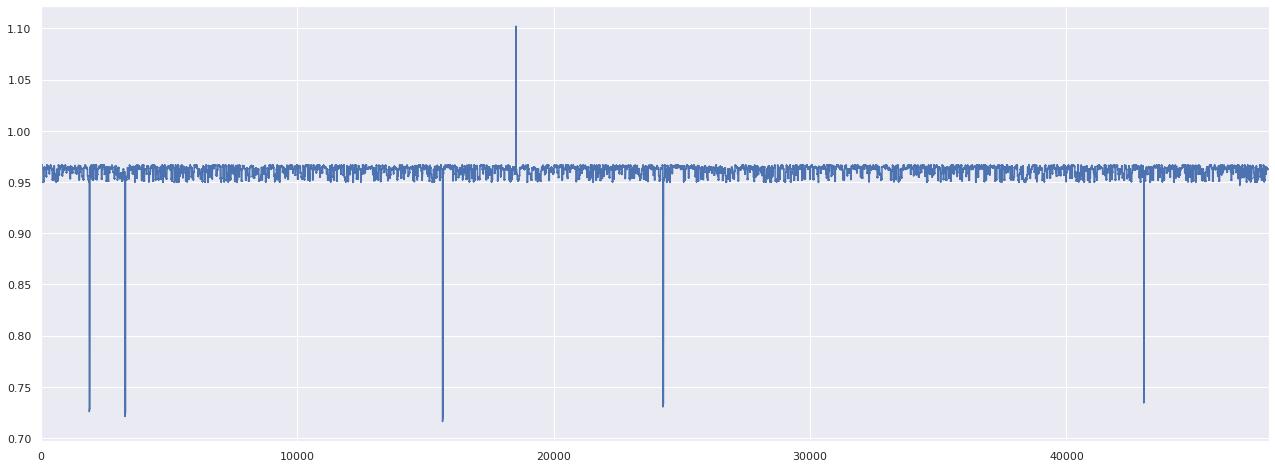

In [147]:
#testo = testo[cols_to_keep]
#testo.Pressure_LateAccess = testo.Pressure_LateAccess / 10
#testo.Pressure_LateAccess.min()
#testo.Pressure_LateAccess.max()
testo.Pressure_LateAccess[(testo.Pressure_LateAccess > 0.7) & (testo.Pressure_LateAccess < 2)].plot()



In [148]:
# Read in files and merge them

#PreFlight & Flight
#path_pre_and_flight = r'../data/experiment/raw/exp_raw_pre_and_flight/' 
#pre_and_flight = read_all_csvs_in_folder(path_pre_and_flight)

#path_postflight1 = '/home/taco/Documents/greta_forarex/Neue gesammelten Daten für Timmy_08082019/Flight Experiment_Postflight_raw_20190808/Postflightdata direkt nach Recovery_11032019 bis 14032019'
#path_postflight2 = '/home/taco/Documents/greta_forarex/Neue gesammelten Daten für Timmy_08082019/Flight Experiment_Postflight_raw_20190808/Postflightdata von 15032019 bis 11042019'

# PostFlight
#postflight_1 = read_all_csvs_in_folder(path_postflight1)
#postflight_2 = read_all_csvs_in_folder(path_postflight2)

# Extra Flight
#path_extra = r'../data/experiment/raw/exp_raw_extra/2019-04-12(1)/2019-04-12/' 
#extra = read_all_csvs_in_folder(path_extra)




In [8]:
#  READING IN DATA
#pre_and_flight = pd.read_pickle('../data/experiment/merged/pre_and_flight_merged.pkl')
#postflight_1 = pd.read_pickle('../data/experiment/merged/postflight_1_merged.pkl')
#postflight_2 = pd.read_pickle('../data/experiment/merged/postflight_2_merged.pkl')



In [17]:
# Saving to disk the merged files (not yet processed)
# In Pickle format for fast read in
#pre_and_flight.to_pickle('../data/experiment/merged/pre_and_flight_merged.pkl')
postflight_2.to_pickle('../data/experiment/merged/postflight_1_merged.pkl')
#extra.to_pickle('../data/experiment/merged/extra_merged.pkl')
# In CSV
#pre_and_flight.to_csv('../data/experiment/merged/pre_and_flight_merged.csv')
postflight_2.to_csv('../data/experiment/merged/postflight_1_merged.csv')
#extra.to_csv('../data/experiment/merged/extra_merged.csv')


In [18]:
## Remove all unncessary columns
cols_to_keep = ['timeStamp',
                'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue',
                'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2',
                'Pressure_LateAccess']

#pre_and_flight = pre_and_flight[cols_to_keep]
postflight_1 = postflight_1[cols_to_keep]
#extra = extra[cols_to_keep]

In [19]:
# DFs contain negligible amount of missing values (NAs), just drop them
#import missingno as msno
#msno.matrix(postflight_1)
#pre_and_flight.dropna(inplace=True)
postflight_1.dropna(inplace=True)
#extra.dropna(inplace=True)

In [20]:
# Naive DateTime TimeStamp needs to be increased by 1hour (UTC+1 for Sweden) compared to what was recorded (apparently UTC, UK)
#pre_and_flight.loc[:,'timeStamp'] = pd.to_datetime(pre_and_flight.timeStamp, unit='s')
postflight_1.loc[:,'timeStamp'] = pd.to_datetime(postflight_2.timeStamp, unit='s')
#extra.loc[:,'timeStamp'] = pd.to_datetime(extra.timeStamp, unit='s').dt.tz_localize('UTC').dt.tz_convert('Europe/Stockholm')


In [37]:
# Check the data range of the final timestamps
#pre_and_flight.timeStamp.min()
#pre_and_flight.timeStamp.max()
postflight_1.timeStamp.min()
postflight_1.timeStamp.max()
#postflight_2.timeStamp.min()
#postflight_2.timeStamp.max()

#extra.timeStamp.min()
#extra.timeStamp.max()


Timestamp('2000-01-01 00:02:46')

Timestamp('2000-01-04 20:03:51')

In [128]:
#postflight_1.to_pickle(r'~/Documents/greta_forarex/new_data/merged_and_processed/postflight_1.pkl')
#testo = pd.read_pickle(r'~/Documents/greta_forarex/new_data/merged_and_processed/postflight_1.pkl')

In [25]:
# Create different time epochs for convenient plotting & exploration
# Pre and Flight
#pre_and_flight.loc[:, 'year'] = pre_and_flight.timeStamp.dt.year
#pre_and_flight.loc[:, 'month'] = pre_and_flight.timeStamp.dt.month
#pre_and_flight.loc[:, 'day'] = pre_and_flight.timeStamp.dt.day
#pre_and_flight.loc[:, 'hour'] = pre_and_flight.timeStamp.dt.hour
#pre_and_flight.loc[:, 'minute'] = pre_and_flight.timeStamp.dt.minute
#pre_and_flight.loc[:, 'second'] = pre_and_flight.timeStamp.dt.second

# Postflight
postflight_1.loc[:, 'year'] = postflight_1.timeStamp.dt.year
postflight_1.loc[:, 'month'] = postflight_1.timeStamp.dt.month
postflight_1.loc[:, 'day'] = postflight_1.timeStamp.dt.day
postflight_1.loc[:, 'hour'] = postflight_1.timeStamp.dt.hour
postflight_1.loc[:, 'minute'] = postflight_1.timeStamp.dt.minute
postflight_1.loc[:, 'second'] = postflight_1.timeStamp.dt.second

# Extra
#extra.loc[:, 'year'] = extra.timeStamp.dt.year
#extra.loc[:, 'month'] = extra.timeStamp.dt.month
#extra.loc[:, 'day'] = extra.timeStamp.dt.day
#extra.loc[:, 'hour'] = extra.timeStamp.dt.hour
#extra.loc[:, 'minute'] = extra.timeStamp.dt.minute
#extra.loc[:, 'second'] = extra.timeStamp.dt.second

In [26]:
#Wichtige Zeitpunkte:
#- Ende Late Access (LA) 11.03.2019  07:45:58
end_late_access = pd.to_datetime('2019-03-11 07:45:58').tz_localize('Europe/Stockholm')#.tz_convert('Europe/Stockholm')
#- Lift-Off (LO) 11.03.2019  10:19:56  --- 11.03.2019 10:20:00 1552296000 Lift-Off (LO)
lift_off = pd.to_datetime('2019-03-11 10:20:00').tz_localize('Europe/Stockholm')#.tz_convert('Europe/Stockholm')
#- De-Spin (keine Rotierung der Rakete) ~ Nullbewegung in alle Richtungen im Video nach 1 min 7s 38 ms nach LO
de_spin = lift_off + pd.Timedelta('1 minutes 7 seconds')
#- Ende des Raketenantriebs (Motorabwurf, keine Beschleunigung, keine Hypergravitation) 1 min 10 s 20 ms nach LO
end_rocket_propulsion = lift_off + pd.Timedelta('1 minutes 10 seconds')
#- Apogee (Zeitpunkt zu dem die Rakete den höchsten Höhenmeter erreicht hat) 124,4 Sekunden nach LO (errreichte Höhe 82,184 km)
apogee = lift_off + pd.Timedelta('124 seconds')
#- Auswurf 1. Fallschirm ~ 5 min 55 s nach LO
parachute_1 = lift_off + pd.Timedelta('5 minutes 55 seconds')
#- Auswurf 2. Fallschirm ~ 6 min 20 s nach LO
parachute_2 = lift_off + pd.Timedelta('6 minutes 20 seconds')
#- Zeitpunkt der Landung 11.03.2019 10:33:41.800000
landing = pd.to_datetime('2019-03-11 10:33:41').tz_localize('Europe/Stockholm')

In [87]:
#date_diff = pd.to_datetime('2019-03-11  13:20:00') - pd.to_datetime('2000-01-01 14:30:02')
postflight_1.timeStamp = postflight_1.timeStamp + date_diff



In [76]:
postflight_1 = postflight_1[postflight_1.timeStamp > pd.to_datetime('2000-01-01 14:02:57')]

In [77]:
postflight_1.timeStamp.min()
postflight_1.timeStamp.max()

Timestamp('2000-01-01 14:03:04')

Timestamp('2000-01-04 20:03:51')

Text(0, 0.5, 'Oxygen Temperature \n [C°]')

Text(0.5, 0, 'Time  \n [H:M:S]')

Text(0.5, 1.0, 'Oxygen Temperature over Time')

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ,
        737132.5]), <a list of 7 Text xticklabel objects>)

(array([20., 22., 24., 26., 28., 30., 32., 34., 36.]),
 <a list of 9 Text yticklabel objects>)

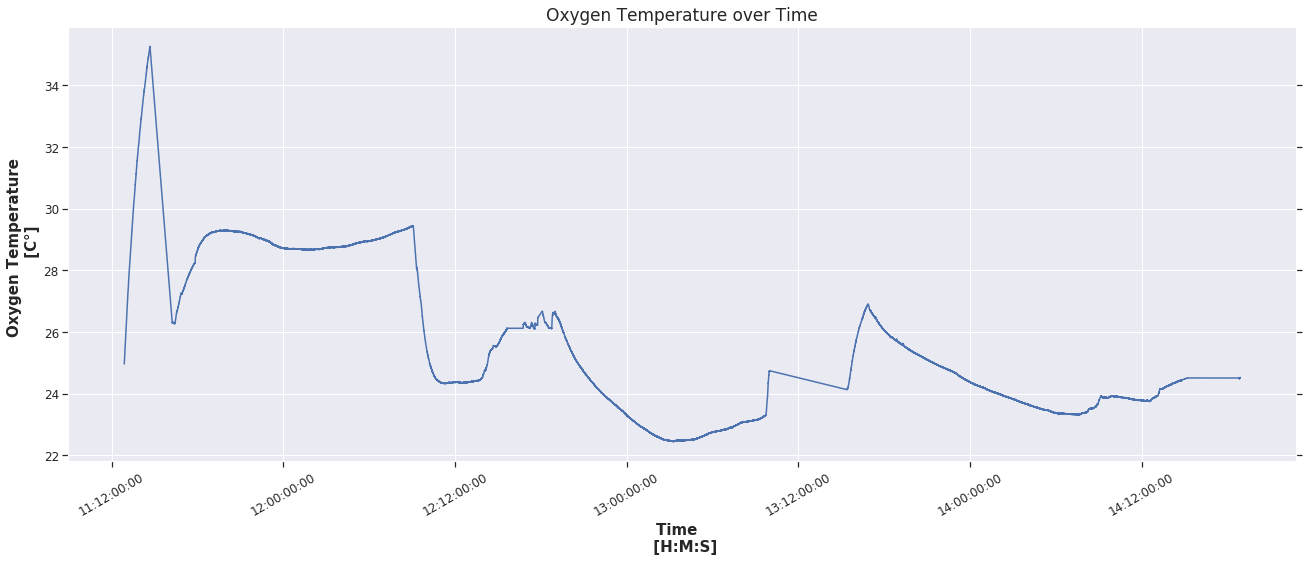

In [88]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff



sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1)],
            x = 'timeStamp',
             y = 'Exp0_OxygenTemp'
            )
plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ,
        737132.5]), <a list of 7 Text xticklabel objects>)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text yticklabel objects>)

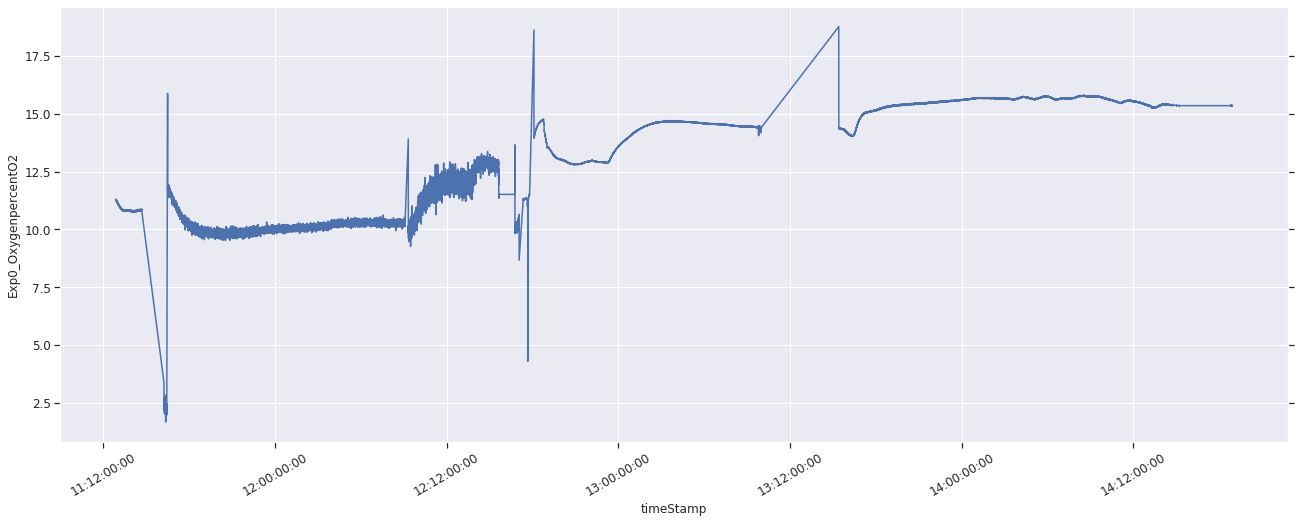

In [98]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff



sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50)],
            x = 'timeStamp',
             y = 'Exp0_OxygenpercentO2'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

In [110]:
#postflight_1.Exp0_PhValue = postflight_1.Exp0_PhValue[postflight_1.Exp0_PhValue < 20]

postflight_1['roll_ph'] = postflight_1.Exp0_PhValue.rolling(100).mean()

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ,
        737132.5]), <a list of 7 Text xticklabel objects>)

(array([6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8]),
 <a list of 8 Text yticklabel objects>)

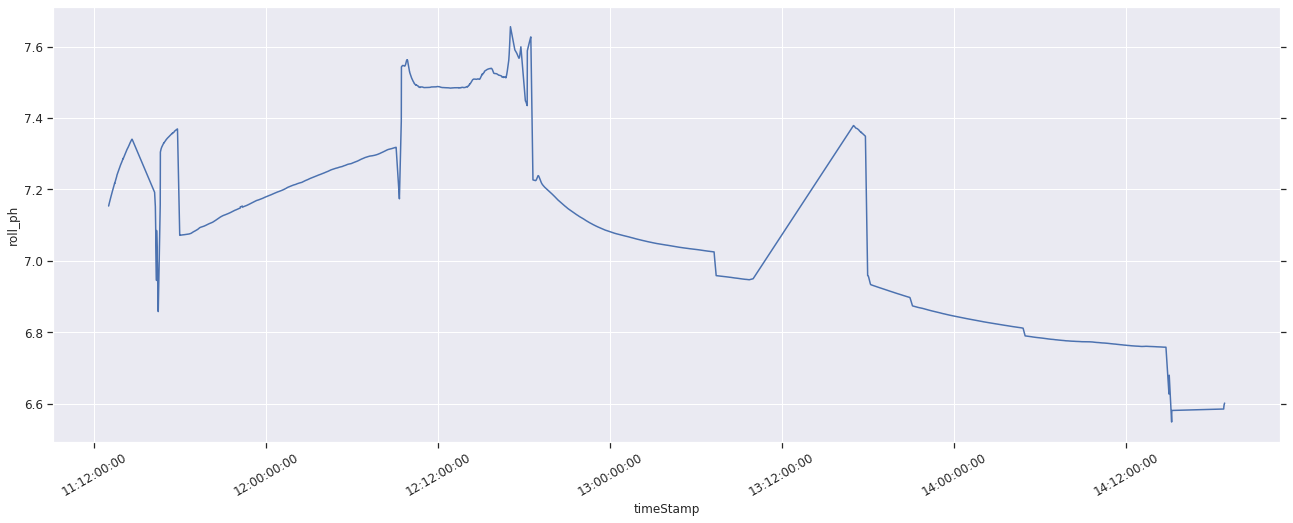

In [111]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff

sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'roll_ph'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ,
        737132.5]), <a list of 7 Text xticklabel objects>)

(array([18., 20., 22., 24., 26., 28., 30., 32., 34.]),
 <a list of 9 Text yticklabel objects>)

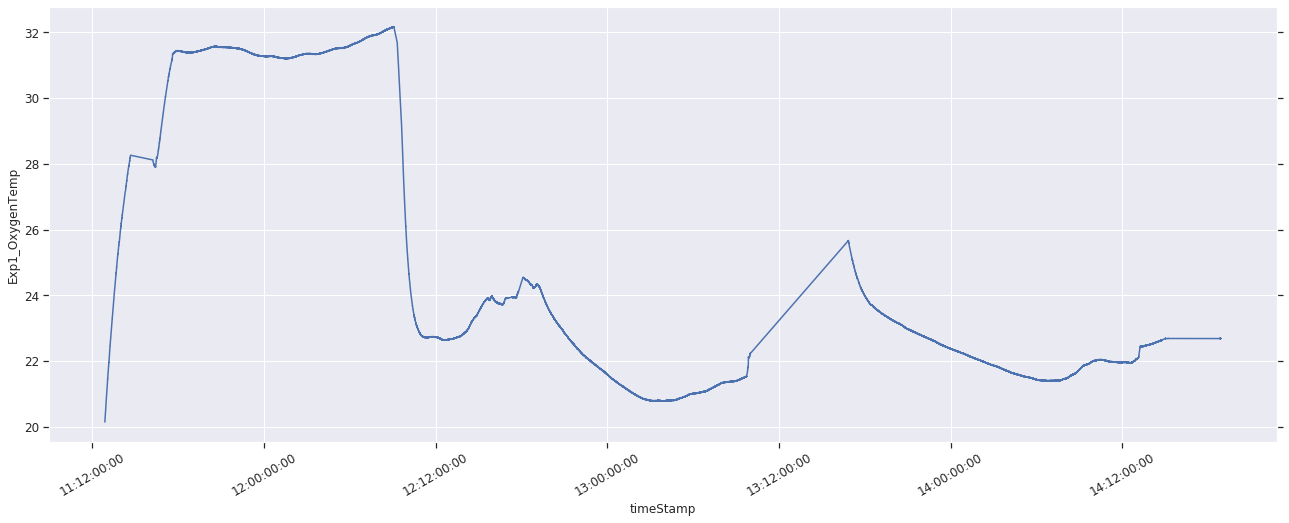

In [113]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff

sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'Exp1_OxygenTemp'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ]),
 <a list of 6 Text xticklabel objects>)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text yticklabel objects>)

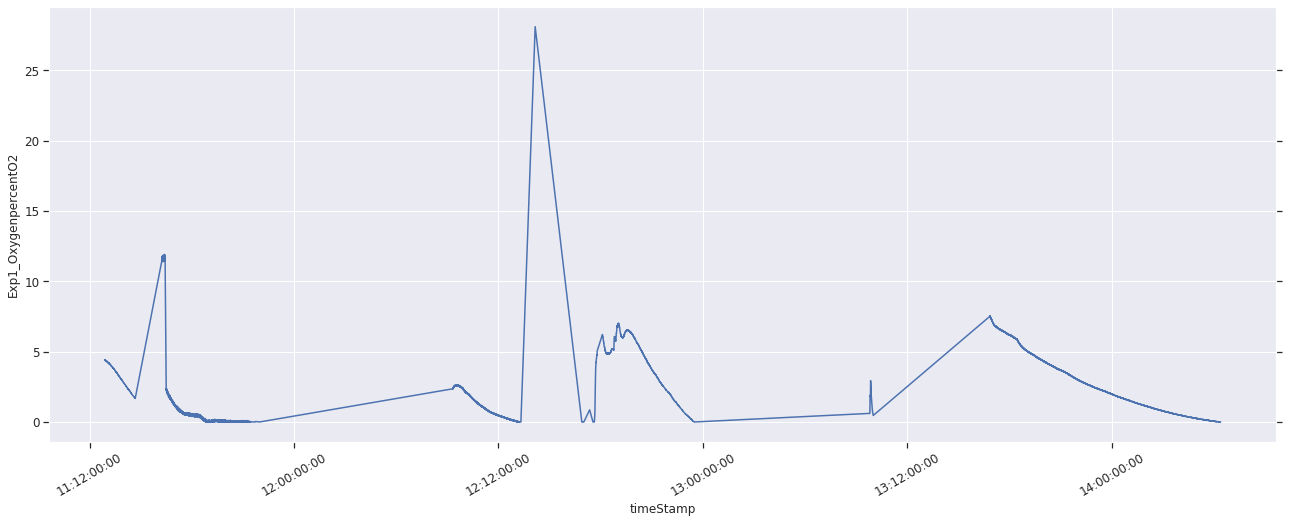

In [116]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff

sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'Exp1_OxygenpercentO2'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ]),
 <a list of 6 Text xticklabel objects>)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

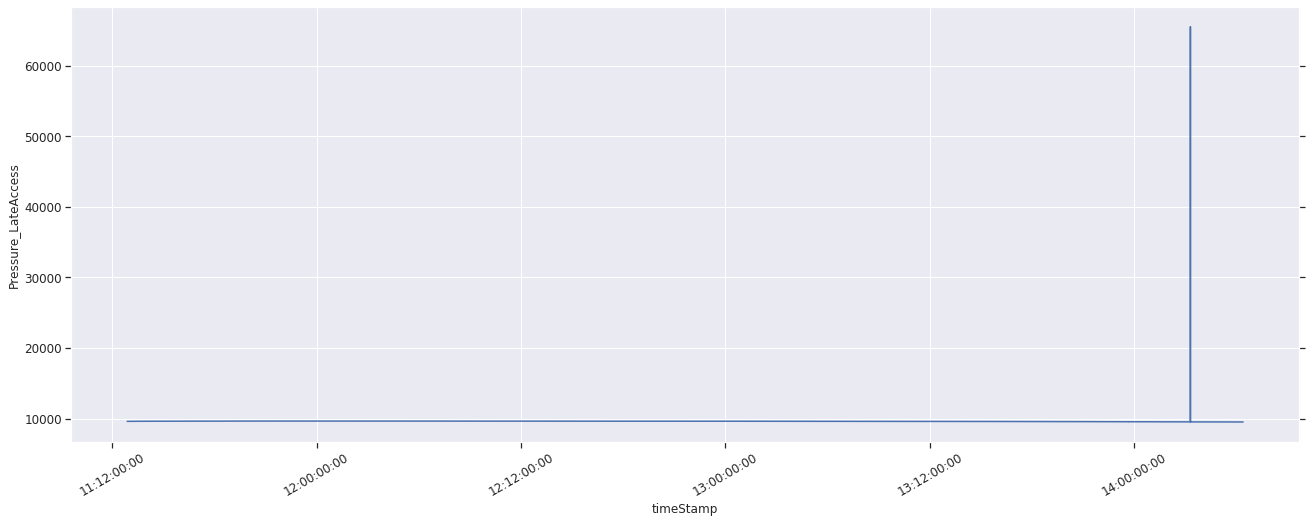

In [124]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff

sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'Pressure_LateAccess'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

In [127]:
#postflight_1.columns
#postflight_1.dtypes
postflight_1.Pressure_LateAccess.min()
postflight_1.Pressure_LateAccess.max()



9466

65535

In [60]:
postflight_1.groupby(['day','hour','minute']).mean()

index  Exp0_OxygenTemp  Exp0_OxygenpercentO2  Exp0_PhValue  Exp1_OxygenTemp  Exp1_OxygenpercentO2  Pressure_LateAccess    year  month     second
day hour minute                                                                                                                                                         
1   0    2       45891.500000         0.000000              0.000000      0.000000         0.000000          0.000000e+00          9581.000000  2000.0    1.0  51.000000
         3       45895.500000         0.000000              0.000000      7.466167         0.000000          0.000000e+00          9580.500000  2000.0    1.0  31.000000
         4       38762.166667         0.000000              0.000000      7.473000         0.000000          0.000000e+00          9580.833333  2000.0    1.0  31.000000
         5       24489.500000         0.000000              0.000000      7.477833         0.000000          0.000000e+00          9581.000000  2000.0    1.0  31.000000
         6       16511.500000         0.000000              0.000000      7.482000         0.000000          0.000000e+00          9580.666667  2000.0    1.0  31.000000
         7         549.500000         0.000000              0.000000      7.486500         0.000000          0.000000e+00          9580.666667  2000.0    1.0  31.000000
         8        5327.833333         0.000000              0.000000      7.490500         0.000000          0.000000e+00          9581.166667  2000.0    1.0  31.000000
         9       14878.500000         0.000000              0.000000      7.495667         0.000000          0.000000e+00          9580.666667  2000.0    1.0  31.000000
         10      14940.166667         0.000000              0.000000      7.500000         0.000000          0.000000e+00          9581.500000  2000.0    1.0  31.000000
         11      15057.500000         0.000000              0.000000      7.506667         0.000000          0.000000e+00          9581.666667  2000.0    1.0  31.000000
         12      20115.090909         7.457727              2.306455      6.143364         7.497545          2.973000e+00          9658.636364  2000.0    1.0  33.727273
         13      25767.538462        14.731154              4.071308      7.486385        14.804769          5.218846e+00          9946.692308  2000.0    1.0  33.230769
         14      21882.055556        18.265556              5.038889      7.295500        15.282944          6.549278e+00          9610.111111  2000.0    1.0  30.666667
         15      22560.166667        18.295333              5.023500      7.297222        18.349389          6.709833e+00          9585.500000  2000.0    1.0  31.000000
         16      31821.750000         6.871000              1.874625      7.447000         6.888250          2.525250e+00          9582.250000  2000.0    1.0  24.875000
         17      34253.500000         0.000000              0.000000      7.541167         0.000000          0.000000e+00          9580.666667  2000.0    1.0  31.000000
         18      34258.500000         0.000000              0.000000      7.545000         0.000000          0.000000e+00          9581.750000  2000.0    1.0  21.000000
    13   2       15660.000000         0.000000              0.000000      0.000000         0.000000          0.000000e+00          7161.000000  2000.0    1.0  57.000000
         3       15666.000000        14.313545              8.480727      6.295727        12.492818          5.013364e+00          7173.545455  2000.0    1.0  30.727273
         4       13421.000000        14.313273              8.383364      6.930636        12.563909          4.905273e+00          7201.818182  2000.0    1.0  31.909091
         5        3280.000000        14.330909              8.427182      6.938455        12.673545          4.867364e+00          7224.909091  2000.0    1.0  29.272727
         6        3162.363636        14.360909              8.456818      6.943182        12.753545          4.841909e+00          7247.4

In [28]:
# Sort DF by timeStamp
#pre_and_flight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
postflight_1.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
#extra.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
# Make timestamp index of DF for easier plotting
#pre_and_flight.set_index('timeStamp', inplace=True)
#postflight.set_index('timeStamp', inplace=True)

In [36]:
postflight_1.sort_values('timeStamp', inplace=True)
postflight_1 = postflight_1.reset_index()


In [33]:
# Scale columns values 

# Pre-and flight
#pre_and_flight.loc[:,'Exp0_OxygenTemp'] = pre_and_flight.Exp0_OxygenTemp/1000
#pre_and_flight.loc[:,'Exp1_OxygenTemp'] = pre_and_flight.Exp1_OxygenTemp/1000
#pre_and_flight.loc[:,'Exp0_OxygenpercentO2'] = pre_and_flight.Exp0_OxygenpercentO2/1000
#pre_and_flight.loc[:,'Exp1_OxygenpercentO2'] = pre_and_flight.Exp1_OxygenpercentO2/1000

# Postflight
postflight_1.loc[:,'Exp0_OxygenTemp'] = postflight_1.Exp0_OxygenTemp/1000
postflight_1.loc[:,'Exp1_OxygenTemp'] = postflight_1.Exp1_OxygenTemp/1000
postflight_1.loc[:,'Exp0_OxygenpercentO2'] = postflight_1.Exp0_OxygenpercentO2/1000
postflight_1.loc[:,'Exp1_OxygenpercentO2'] = postflight_1.Exp1_OxygenpercentO2/1000
postflight_1.loc[:,'Exp0_PhValue'] = postflight_1.Exp0_PhValue/1000






In [17]:
# Saving to disk
# In Pickle format for fast read in
#pre_and_flight.to_pickle('../data/experiment/processed/pre_and_flight_merged.pkl')
#postflight.to_pickle('../data/experiment/processed//postflight_merged.pkl')

# In CSV
#pre_and_flight.to_csv('../data/experiment/processed//pre_and_flight_merged.csv')
#postflight.to_csv('../data/experiment/processed//postflight_merged.csv')



In [18]:
# Pandas Profiling conveniently returns an extensive report with descriptive statistics for each DF
#pre_and_flight.profile_report(style={'full_width':True})
#postflight.profile_report(style={'full_width':True})

In [19]:
# Explore which year, days, hours and minutes were actually recorded
#plt.figure(figsize=(18, 6))
#pre_and_flight.set_index('timeStamp', inplace=True)

/home/taco/anaconda3/lib/python3.6/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)
/home/taco/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


NameError: name 'ax' is not defined

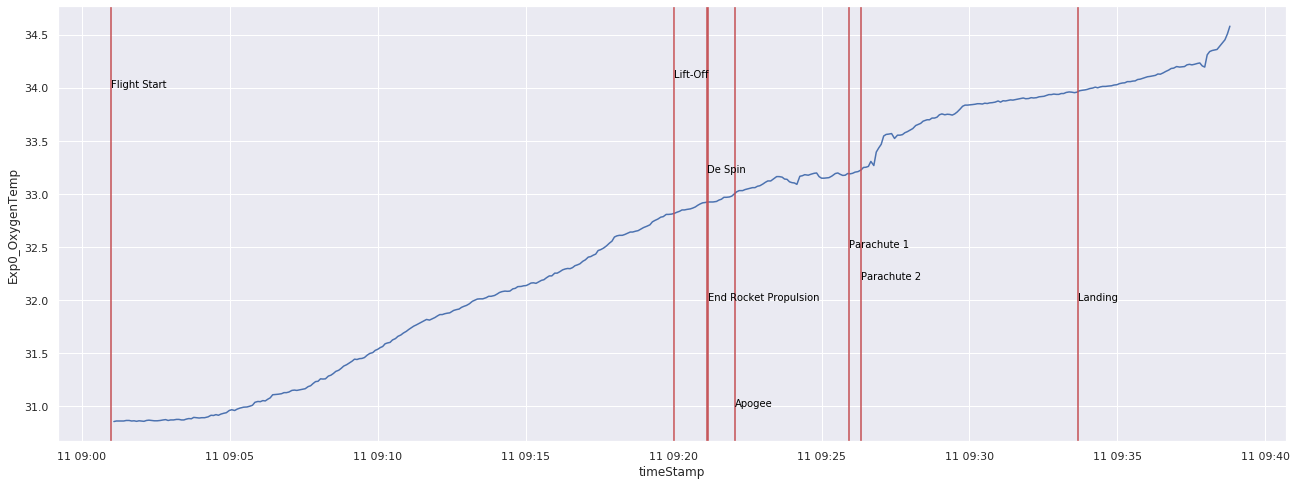

In [20]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start].Exp0_OxygenTemp
            )

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
   
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, 34, 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, 34.1, 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, 33.2, 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, 32, 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, 31, 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, 32.5, 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, 32.2, 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, 32, 'Landing', horizontalalignment='left', size='small', color='black')


# get current axis
#ax = plt.gca()
# get current xtick labels
ax.fmt_xdata = dates.DateFormatter('%H:%M:%S')
# convert all xtick labels to selected format from ms timestamp
#ax.set_xticklabels(pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp.dt.strftime('%H:%M:%S') ,
# rotation=50)

plt.show()

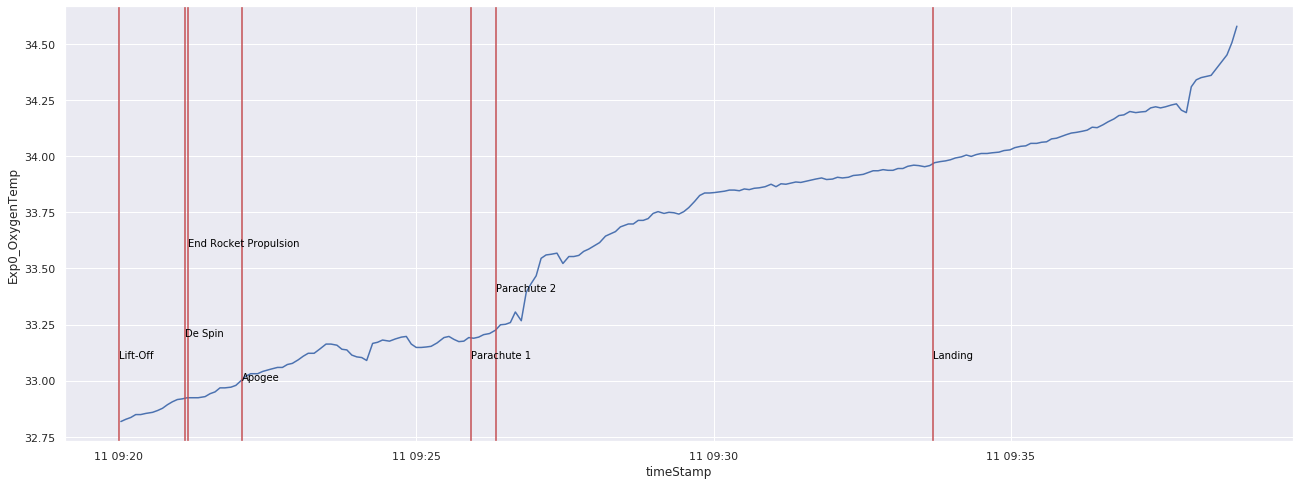

In [22]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp >= lift_off].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp >= lift_off].Exp0_OxygenTemp
            )

events_list = [lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
   
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')

plt.text(lift_off, 33.1, 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, 33.2, 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, 33.6, 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, 33, 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, 33.1, 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, 33.4, 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, 33.1, 'Landing', horizontalalignment='left', size='small', color='black')


# get current axis
#ax = plt.gca()
# get current xtick labels
#ax.fmt_xdata = dates.DateFormatter('%H:%M:%S')
# convert all xtick labels to selected format from ms timestamp
#ax.set_xticklabels(pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp.dt.strftime('%H:%M:%S') ,
# rotation=50)

plt.show()

NameError: name 'ax' is not defined

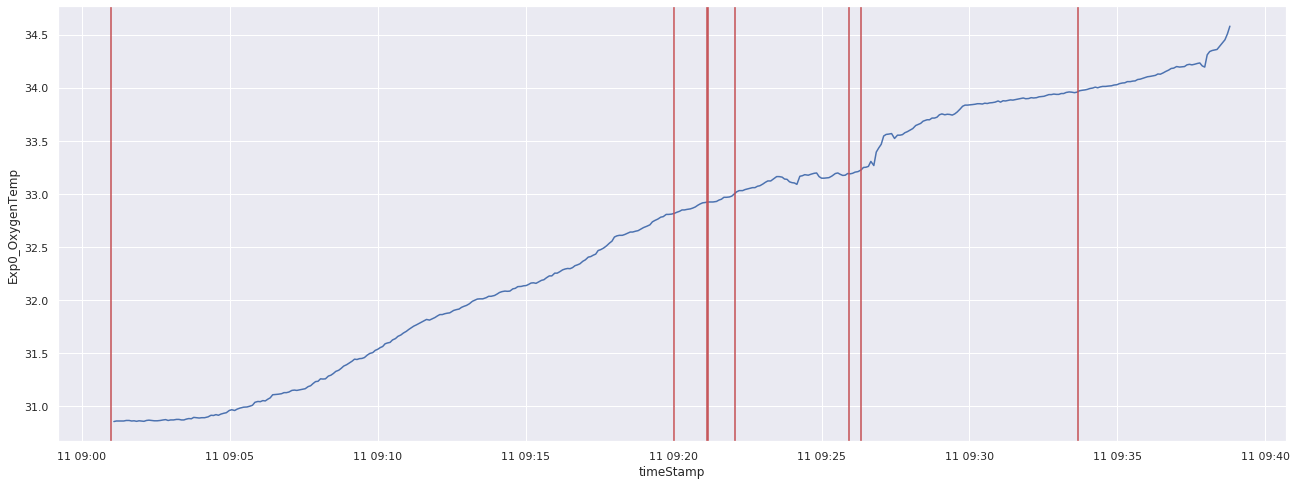

In [23]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]]
            )

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
ylimits = ax.get_ylim()
import random
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(ylimits[0],ylimits[1]), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(ylimits[0],ylimits[1]), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(ylimits[0],ylimits[1]), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(ylimits[0],ylimits[1]), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(ylimits[0],ylimits[1]), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(ylimits[0],ylimits[1]), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(ylimits[0],ylimits[1]), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(ylimits[0],ylimits[1]), 'Landing', horizontalalignment='left', size='small', color='black')
plt.show()

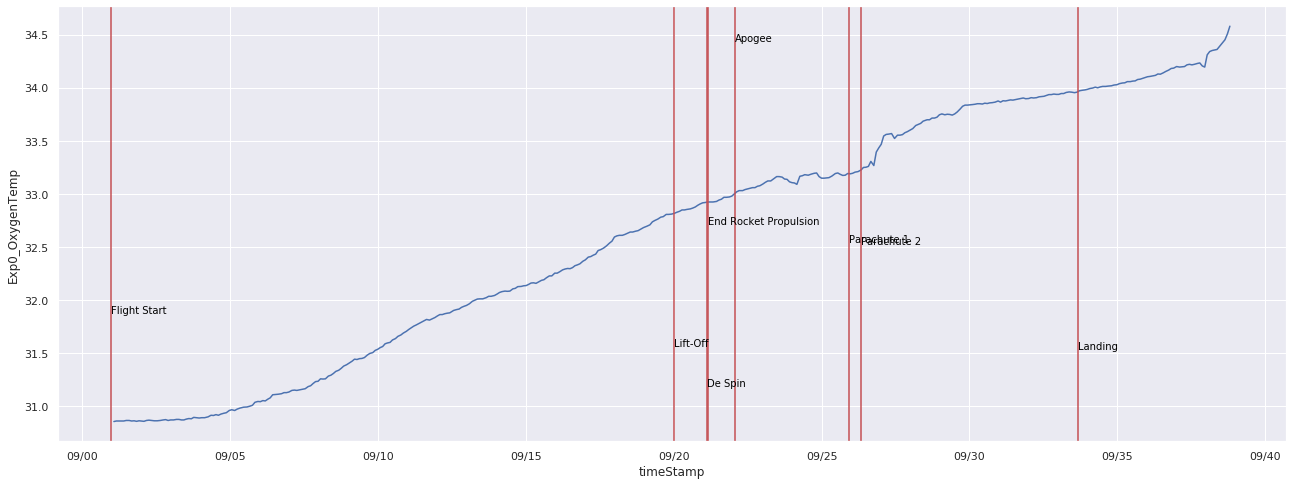

In [42]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
ax = sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

from matplotlib.ticker import AutoMinorLocator, AutoLocator
from matplotlib.dates import DateFormatter
#ax.xaxis.set_major_locator()
#ax.xaxis.set_minor_locator(AutoMinorLocator())
myFmt = DateFormatter("%H/%M") 
ax.xaxis.set_major_formatter(myFmt) 
 

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()

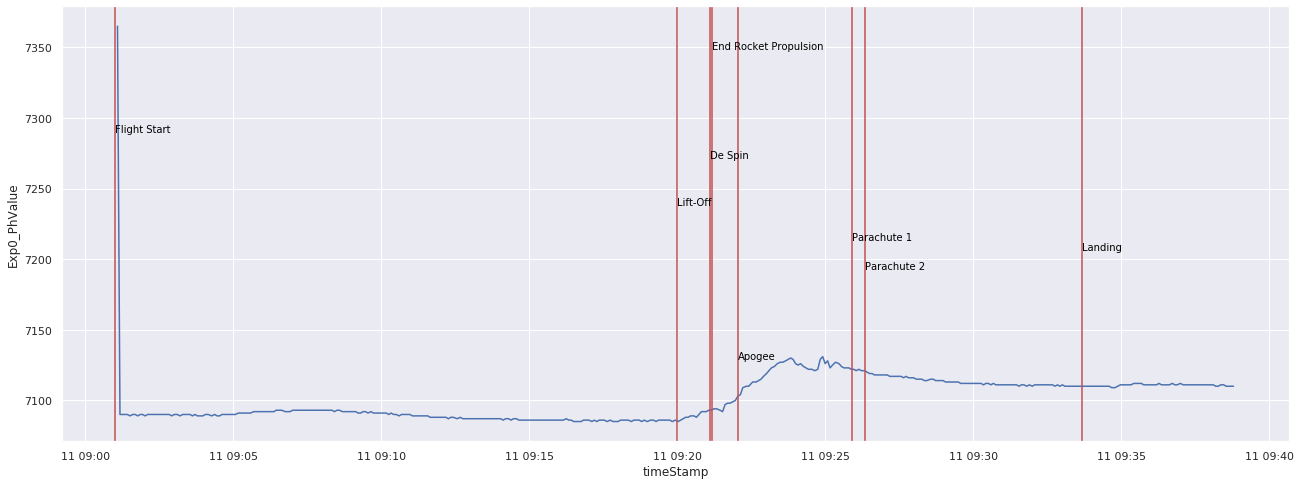

In [26]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[3]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[3]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[3]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()

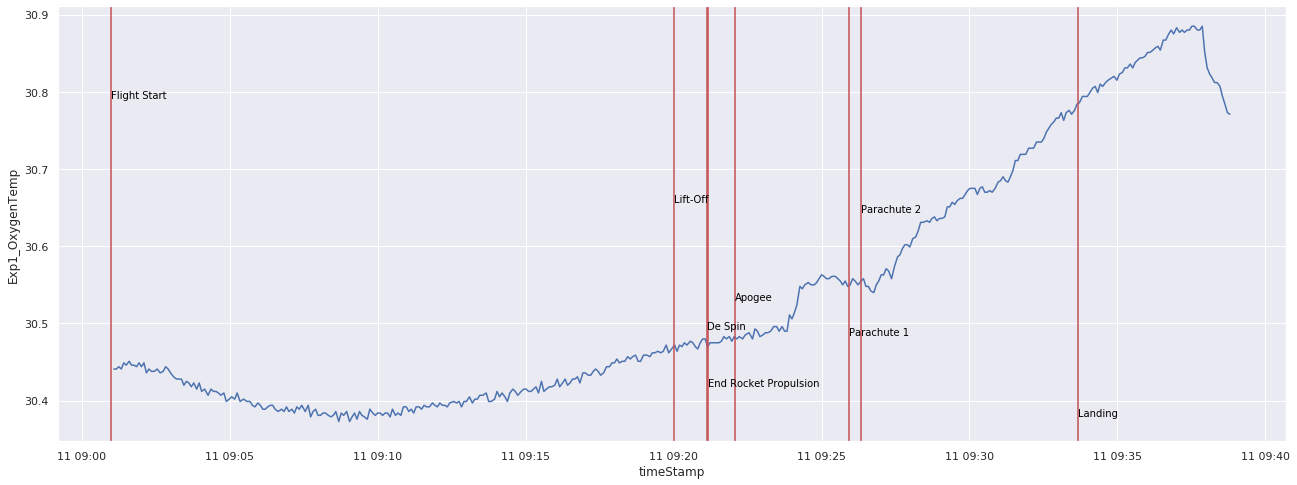

In [27]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[4]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[4]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[4]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()

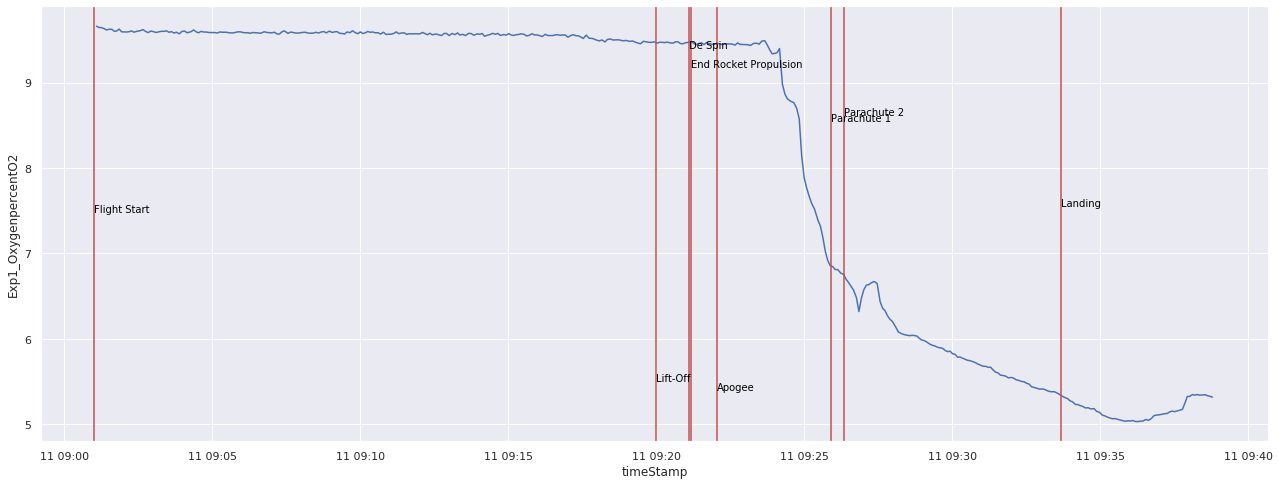

In [28]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[5]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[5]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[5]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()

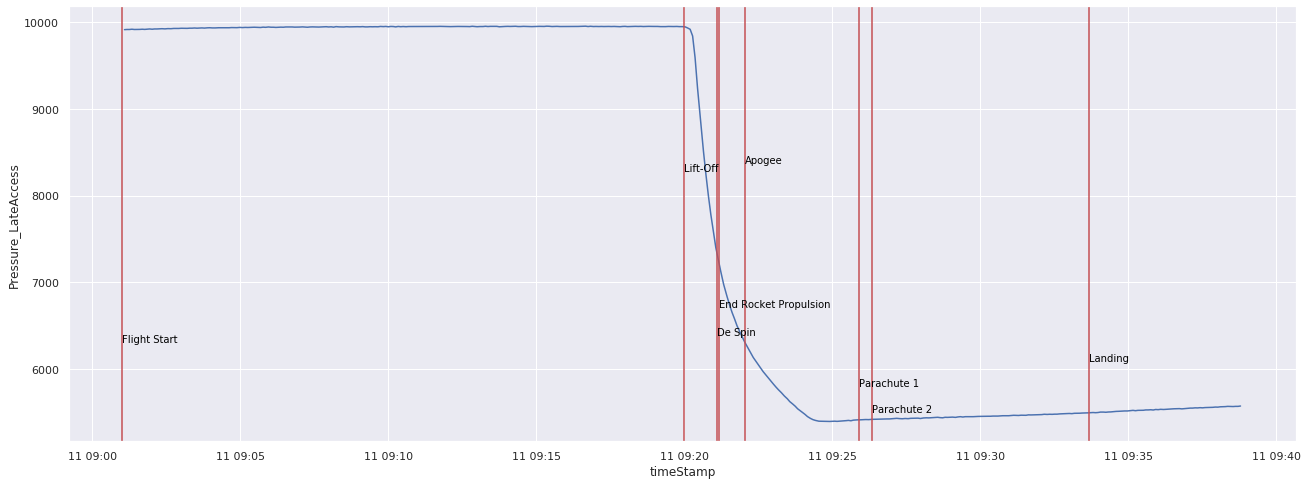

In [29]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[6]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[6]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[6]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()